In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# importing Random Forest classifier
from sklearn.ensemble import RandomForestClassifier


import os
from pathlib import Path
import time
from collections import OrderedDict, namedtuple

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [3]:
if IN_COLAB:

    from google.colab import drive
    drive.mount('/drive', force_remount=True)
    datadir = '/drive/My Drive/Colab Notebooks/Datasets/'
    optim_dir = datadir + '/optim_dir/'
    results_folder = datadir+'/results/UCI/'
    Path(results_folder).mkdir(parents=True, exist_ok=True)
    Path(optim_dir).mkdir(parents=True, exist_ok=True)
else:
  results_folder = 'results'
  optim_dir = 'optim_dir'
  Path("results").mkdir(parents=True, exist_ok=True)
  Path(optim_dir).mkdir(parents=True, exist_ok=True)


# from opfunu.cec_basic.cec2014_nobias import *
# from mealpy.swarm_based.PSO import BasePSO

Mounted at /drive


In [4]:
import sys

!pip install category_encoders
import category_encoders as ce

if IN_COLAB:
  
  scripts_dir = '/drive/My Drive/Colab Notebooks/scripts/'
  sys.path.insert(1, scripts_dir)
# from opfunu.cec_basic.cec2014_nobias import *
# from mealpy.swarm_based.PSO import BasePSO

# insert at 1, 0 is the script path (or '' in REPL)
else:
    sys.path.insert(1, 'scripts')
from geneticalgorithm import geneticalgorithm as ga
import pickle

In [5]:
# Enable GPU processing
# if IN_COLAB:
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# else:
#     device = torch.device("cpu")
# print(f'Device type: {device}')

In [6]:
# Set random seed
seed = 777
# torch.manual_seed(seed)
model = None

In [7]:
import random
def seeding(SEED):
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ['PYTHONHASHSEED'] = str(SEED)
    os.environ['TF_CUDNN_DETERMINISTIC'] = str(SEED)
    # tf.random.set_seed(SEED)
    print('seeding done!!!')
seeding(seed)

seeding done!!!


In [8]:
df = pd.read_csv(f"{datadir}UCI/BreastCancer/data.csv")

In [9]:
df.shape
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df.shape 

(569, 33)

In [12]:
df.value_counts

<bound method DataFrame.value_counts of            id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]>

In [13]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [14]:
df.drop('Unnamed: 32', axis = 1, inplace = True)


In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Getting Features

x = df.drop(columns = 'diagnosis')

# Getting Predicting Value
y = df['diagnosis']

In [17]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
X_train.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,897880,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,0.2619,2.0150,1.778,16.85,0.007803,0.01449,0.01690,0.008043,0.02100,0.002778,11.16,26.84,71.98,384.0,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,90745,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,0.3077,1.6210,2.240,20.20,0.006543,0.02148,0.02991,0.010450,0.01844,0.002690,12.76,32.04,83.69,489.5,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,905189,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,0.2387,0.6372,1.729,21.83,0.003958,0.01246,0.01831,0.008747,0.01500,0.001621,17.71,19.58,115.90,947.9,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,86211,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,0.3661,1.5110,2.410,24.44,0.005433,0.01179,0.01131,0.015190,0.02220,0.003408,12.83,20.92,82.14,495.2,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,91376701,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,0.2239,1.1390,1.577,18.04,0.005096,0.01205,0.00941,0.004551,0.01608,0.002399,14.17,31.99,92.74,622.9,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


In [19]:
print(len(X_train), len(X_test))

455 114


In [20]:
# Create a class to manage the training / hyperparameter runs
class RunManager():
  def __init__(self):
    self.run_params = None
    self.run_count = 0
    self.run_data = []
    
    #---
    self.results = None

  def begin_run(self, run):
    self.run_params = run
    self.run_count += 1
    

  def end_run(self, train_accuracy, test_accuracy):
    # self.epoch_count = 0
    # train_accuracy = 
    # test_accuracy = 

    print(f'run_params: {self.run_params} Train Acc: {train_accuracy} Test Acc: {test_accuracy}')

    results = OrderedDict()
    results['run'] = self.run_count
    results['train acc'] = train_accuracy
    results['test acc'] = test_accuracy
    
    # ---
    self.results = results

    for k, v in self.run_params.items():
      results[k] = v

    self.run_data.append(results)

  def save_output(self, filename):
    if filename:
      filename = filename
      pd.DataFrame.from_dict(self.run_data, orient='columns').to_csv(f'{filename}.csv')
      
      # with open(f'{filename}.json', 'w', encoding='utf-8') as f:
      #   json.dump(self.run_data, f, ensure_ascii=False, indent=4)

      # print('Results saved to disk')

    return pd.DataFrame.from_dict(self.run_data, orient='columns')


In [21]:
# Define training loop execution
def execution_loop(m, args): # args is given by the optimizer
    agent = {}
    agents = []
    
    agent['n'] = args[0].astype(int)
    agent['m'] = int(args[1])
    agents.append(agent)
#     m = RunManager()
    for run in agents: # this should be one. a particle in pso

        # print(f'Run Params: {run}')

        m.begin_run(run)

        num_predictors = X_train.shape[1]
        if run['m'] <= num_predictors:

          rfc = RandomForestClassifier(n_estimators=run['n'], max_features=run['m'], random_state=0)
          rfc.fit(X_train, y_train)

          y_pred_train = rfc.predict(X_train)
          y_pred_test = rfc.predict(X_test)

          train_score = accuracy_score(y_train, y_pred_train)
          test_score = accuracy_score(y_test, y_pred_test)
        else:
          train_score = 0
          test_score = 0

        m.end_run(train_score, test_score)
    return m.results['test acc']

In [22]:
# Define training run hyperparameters
params = {
    'n' : [1, 200],
    'm' : [1, 20]
}

# params = OrderedDict(
#     lr = [0, 1],
#     batch_size = [20 2000],
#     n_epochs = [3]
# )

In [23]:
m = RunManager()
timestr = time.strftime("%Y%m%d-%H%M%S")
filename = f'Run_Results-UCI-Breast-Cancer-GA-{timestr}'
# filename = 'Run_Results-PSO-20210504-035642-cont.csv' # this is for trying to continue from last optim save


In [24]:
def run_train_model(agent):
    test_acc = execution_loop(m, agent)
    m.save_output(f'{results_folder}/{filename}')
    print("test acc: ", test_acc)
    return test_acc * -1

run_params: {'n': 31, 'm': 6} Train Acc: 1.0 Test Acc: 0.9649122807017544
test acc:  0.9649122807017544
run_params: {'n': 13, 'm': 9} Train Acc: 0.9956043956043956 Test Acc: 0.956140350877193
test acc:  0.956140350877193
run_params: {'n': 167, 'm': 18} Train Acc: 1.0 Test Acc: 0.9736842105263158
test acc:  0.9736842105263158
run_params: {'n': 145, 'm': 15} Train Acc: 1.0 Test Acc: 0.956140350877193
test acc:  0.956140350877193
run_params: {'n': 54, 'm': 13} Train Acc: 1.0 Test Acc: 0.9649122807017544
test acc:  0.9649122807017544
run_params: {'n': 19, 'm': 2} Train Acc: 1.0 Test Acc: 0.956140350877193
test acc:  0.956140350877193
run_params: {'n': 118, 'm': 7} Train Acc: 1.0 Test Acc: 0.9736842105263158
test acc:  0.9736842105263158
run_params: {'n': 197, 'm': 12} Train Acc: 1.0 Test Acc: 0.9736842105263158
test acc:  0.9736842105263158
run_params: {'n': 136, 'm': 11} Train Acc: 1.0 Test Acc: 0.9649122807017544
test acc:  0.9649122807017544
run_params: {'n': 54, 'm': 8} Train Acc: 1.0 

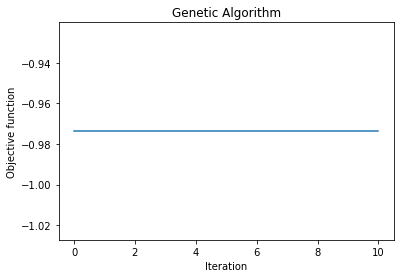

Time to execute: 55.7033 seconds


NameError: ignored

In [25]:
verbose = True
pop_size = 15   
max_iter = 10

obj_func = run_train_model

lb = [params['n'][0], params['m'][0]]
ub = [params['n'][1], params['m'][1]]

algorithm_param = {'max_num_iteration': max_iter,\
                   'population_size':pop_size,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.1,\
                   'crossover_probability': 0.6,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

varbound = np.array([ [ lb[0], ub[0] ], [ lb[1], ub[1] ] ] )

tic = time.perf_counter() # Start time counter
model=ga(function=obj_func,dimension=2,variable_type='real',variable_boundaries=varbound, algorithm_parameters=algorithm_param, function_timeout=1000)
model.run(f"{optim_dir}/ga_data-UCI-Breast-Cancer-{timestr}.data")

toc = time.perf_counter() # End time counter
print(f'Time to execute: {toc - tic:0.4f} seconds')
print(f'Best Position: {[int(x) for x in best_pos1]} Best Solution: {best_fit1:0.5f}')

# m.save_output(f'{results_folder}/{filename}')
# print('Results saved.')
